In [2]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [5]:
# code here
series = pd.Series([])
series

,0


###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [7]:
# code here
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([6, 7, 8, 9, 10])
print(s1 - s2)
print(s1 + s2)
print(s1 * s2)
print(s1 / s2)

0   -5
1   -5
2   -5
3   -5
4   -5
dtype: int64
0     7
1     9
2    11
3    13
4    15
dtype: int64
0     6
1    14
2    24
3    36
4    50
dtype: int64
0    0.166667
1    0.285714
2    0.375000
3    0.444444
4    0.500000
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [8]:
# code here
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])
print(s1 > s2)
print(s1 < s2)
print(s1 == s2)

0     True
1     True
2     True
3     True
4    False
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0    False
1    False
2    False
3    False
4     True
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [10]:
def change_dtype(series, datatype):
  return series.astype(datatype)

In [12]:
# code here
series = pd.Series([1, 2, 2.0, True, 100])
change_dtype(series, float)

,0
0,1.0
1,2.0
2,2.0
3,1.0
4,100.0


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [13]:
ipl = pd.read_csv("/content/IPL_Ball_by_Ball_2008_2022.csv")
ipl.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [19]:
# code here
ipl.groupby("batter")["batsman_run"].sum().sort_values(ascending= False).head(10)

,batsman_run
batter,
V Kohli,6634
S Dhawan,6244
DA Warner,5883
RG Sharma,5881
SK Raina,5536
AB de Villiers,5181
CH Gayle,4997
MS Dhoni,4978
RV Uthappa,4954


###`Q-7` No of players having runs above 3000

In [26]:
# code here
temp_df = ipl.groupby("batter")["batsman_run"].sum().sort_values(ascending= False)
temp_df[temp_df > 3000].count()

20

###`Q-8` No of players having runs above mean value?

In [28]:
# code here
temp_df = ipl.groupby("batter")["batsman_run"].sum()
temp_df[temp_df > temp_df.mean()]

,batsman_run
batter,
A Symonds,974
AB de Villiers,5181
AC Gilchrist,2069
AD Mathews,724
AD Russell,2039
...,...
WP Saha,2427
Y Venugopal Rao,985
YBK Jaiswal,547


Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [41]:
# code here
items = pd.read_csv("/content/items.csv").set_index("item_name")
items.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98


In [42]:
items.isnull().sum()

,0
item_price,50


In [45]:
items["item_price"] = items["item_price"].str.replace("$", "")
items["item_price"] = items["item_price"].astype(float)
items["item_price"] = items["item_price"] * 80.0
items.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,191.2
Izze,271.2
Nantucket Nectar,271.2
Chips and Tomatillo-Green Chili Salsa,191.2
Chicken Bowl,1358.4


In [50]:
items["item_price"] = items["item_price"].fillna(items["item_price"].mean())
items.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,191.2
Izze,271.2
Nantucket Nectar,271.2
Chips and Tomatillo-Green Chili Salsa,191.2
Chicken Bowl,1358.4


###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [52]:
# code here
items["item_price"].mean()

597.0425196850393

In [54]:
percentile_30 = items["item_price"].quantile(0.30)
print(percentile_30)
percentile_6 = items["item_price"].quantile(0.06)
print(percentile_6)

356.0
100.0


<Axes: ylabel='Frequency'>

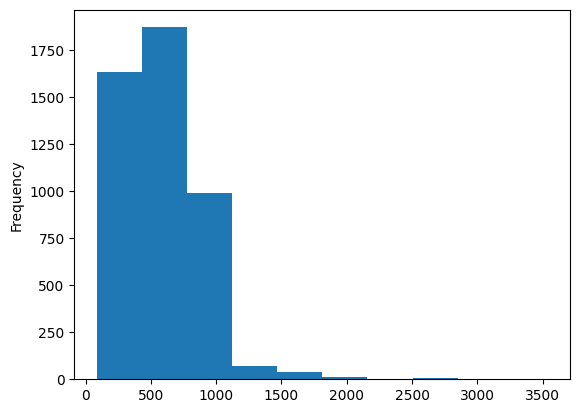

In [57]:
items["item_price"].plot(kind= "hist", bins= 10)

In [59]:
items[(items["item_price"] > 1000) & (items["item_price"] < 2000)]

,item_price
item_name,
Chicken Bowl,1358.4
Chicken Salad Bowl,1800.0
Steak Burrito,1438.4
Chicken Burrito,1400.0
Chicken Bowl,1400.0
...,...
Chicken Bowl,1800.0
Steak Bowl,1880.0
Chicken Bowl,1400.0
